In [1]:
%reload_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import torch
torch.__version__

'0.4.1'

In [3]:
from postprocessing.euclidean_distance import L2
from postprocessing.postprocessing import Post_Pipeline

In [4]:
fp = './WC_input/data/'
rp = './WC_result/data/'

model_name = 'seresnext101'
fold = 2
checkpoint = '20600'
algo = 'dist_global_org'

In [5]:
dist = L2(model_name, fold, checkpoint)
dist.querytopnclosest(100)

In [30]:
pip = Post_Pipeline(model_name, fold, checkpoint, algo, dist.test.iloc[:, :21])

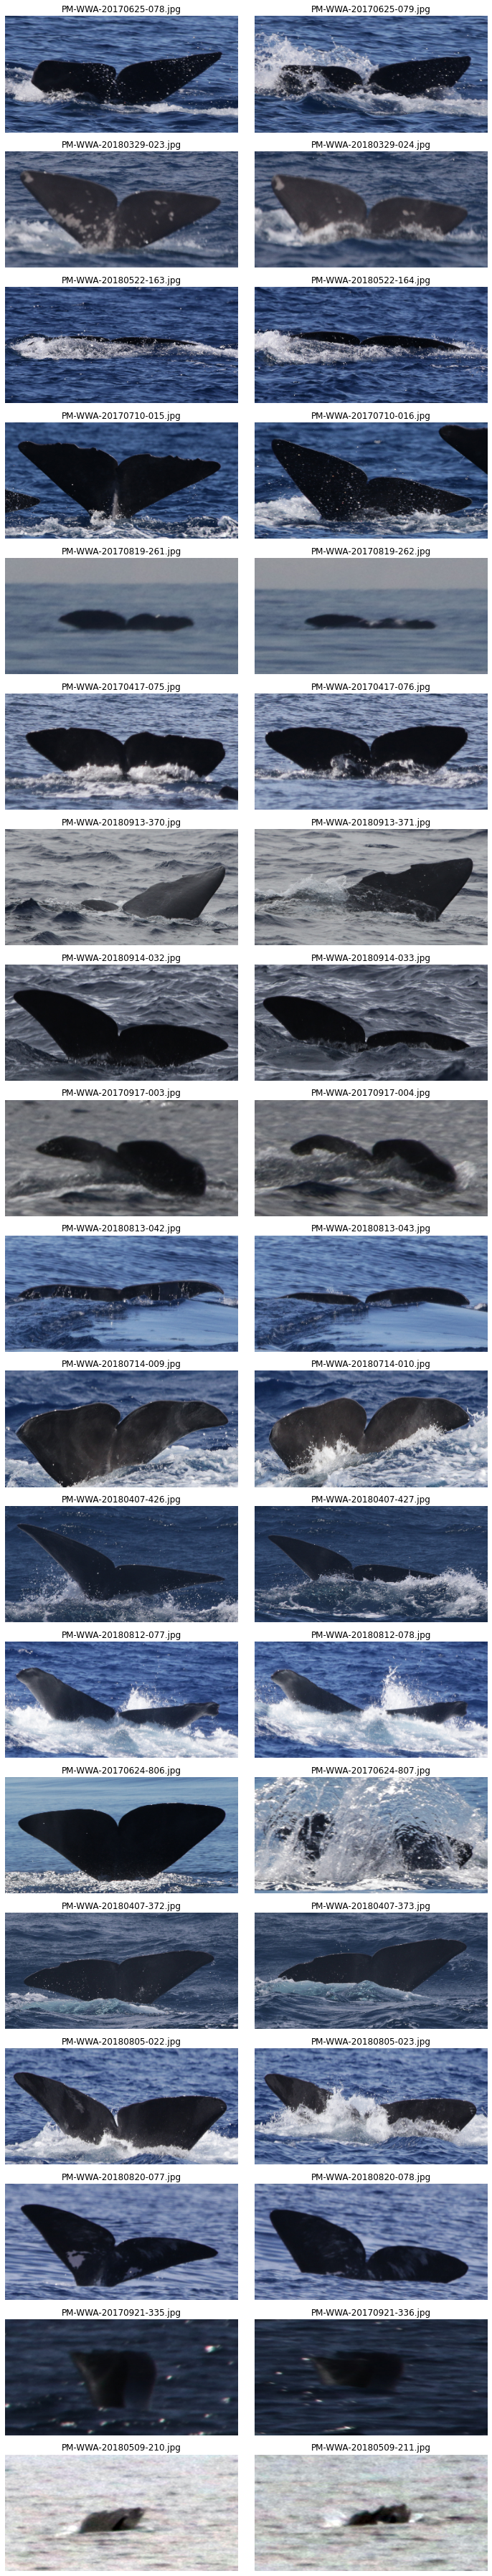

In [31]:
pip.match_images_on_fname()
pip.view_matched_images()

In [32]:
df1 = pip.infer_missing_from_train_set()
df2 = pip.match_images_on_fname()
df12 = pip.match_images_on_fname(df1)

In [33]:
df12.to_csv('best_submission.csv', header=None)

------------------------------------


## Review predictions of ML model 

In [34]:
human_ML = df12.copy()
df12_copy = df12.copy()

In [40]:
def generate_whales(n):
    for i in range(n):
        yield pip.show_top20_imgs(df12_copy.index[i], df12_copy)

In [41]:
gen_whale = generate_whales(807)

PM-WWA-20170731-007.jpg
1
PM-WWA-20050707-175.jpg
2
PM-WWA-20100723-281.jpg
3
PM-WWA-20110618-241.jpg
4
PM-WWA-20140901-096.jpg
5
PM-WWA-20090702-087.jpg
6
PM-WWA-20080713-044.jpg
7
PM-WWA-20060621-A006.jpg
8
PM-WWA-20060621-015.jpg
9
PM-WWA-20070831-020.jpg
10
PM-WWA-20050625-105.jpg
11
PM-WWA-20120820-015.jpg
12
PM-WWA-20070810-040.jpg
13
PM-WWA-20180804-222.jpg
14
PM-WWA-201006029-110.jpg
15
PM-WWA-20090702-038.jpg
16
PM-WWA-20150809-282.jpg
17
PM-WWA-20060422-009.jpg
18
PM-WWA-20060422-021.jpg
19
PM-WWA-20060911-026.jpg
20
PM-WWA-20080809-170.jpg


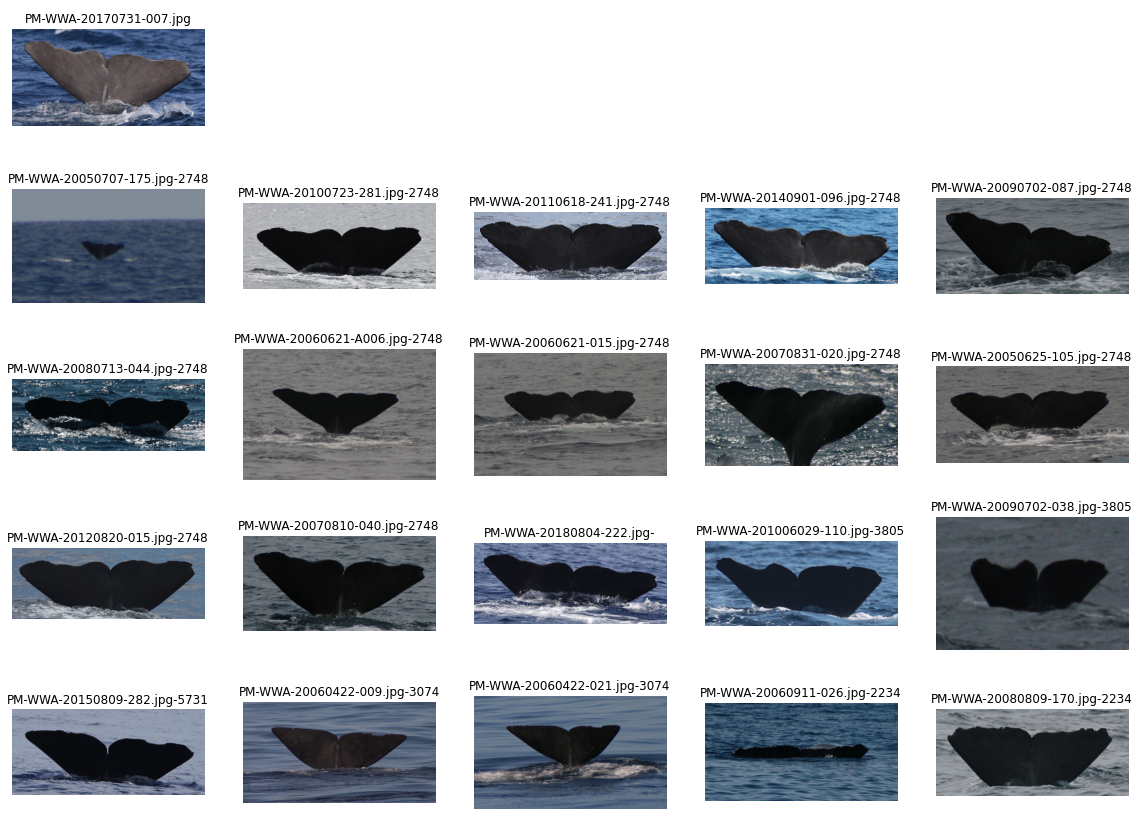

In [57]:
next(gen_whale)

In [58]:
ref = 'PM-WWA-20170731-007.jpg'
df = pd.DataFrame(human_ML.loc[ref]).copy()
df['sorting'] = 0
df.loc[[20], 'sorting'] = -1
df = df.sort_values('sorting').reset_index(drop=True)[ref]
df.index += 1 
human_ML.loc[ref] = df.copy()

In [59]:
final_result_post1.loc[ref]

1      PM-WWA-20050707-175.jpg
2      PM-WWA-20100723-281.jpg
3      PM-WWA-20110618-241.jpg
4      PM-WWA-20140901-096.jpg
5      PM-WWA-20090702-087.jpg
6      PM-WWA-20080713-044.jpg
7     PM-WWA-20060621-A006.jpg
8      PM-WWA-20060621-015.jpg
9      PM-WWA-20070831-020.jpg
10     PM-WWA-20050625-105.jpg
11     PM-WWA-20120820-015.jpg
12     PM-WWA-20070810-040.jpg
13     PM-WWA-20180804-222.jpg
14    PM-WWA-201006029-110.jpg
15     PM-WWA-20090702-038.jpg
16     PM-WWA-20150809-282.jpg
17     PM-WWA-20060422-009.jpg
18     PM-WWA-20060422-021.jpg
19     PM-WWA-20060911-026.jpg
20     PM-WWA-20080809-170.jpg
Name: PM-WWA-20170731-007.jpg, dtype: object

In [60]:
human_ML.loc[ref]

1      PM-WWA-20080809-170.jpg
2      PM-WWA-20060422-021.jpg
3      PM-WWA-20060422-009.jpg
4      PM-WWA-20150809-282.jpg
5      PM-WWA-20090702-038.jpg
6     PM-WWA-201006029-110.jpg
7      PM-WWA-20180804-222.jpg
8      PM-WWA-20070810-040.jpg
9      PM-WWA-20120820-015.jpg
10     PM-WWA-20050707-175.jpg
11     PM-WWA-20070831-020.jpg
12     PM-WWA-20060621-015.jpg
13    PM-WWA-20060621-A006.jpg
14     PM-WWA-20080713-044.jpg
15     PM-WWA-20090702-087.jpg
16     PM-WWA-20140901-096.jpg
17     PM-WWA-20110618-241.jpg
18     PM-WWA-20100723-281.jpg
19     PM-WWA-20060911-026.jpg
20     PM-WWA-20050625-105.jpg
Name: PM-WWA-20170731-007.jpg, dtype: object

In [61]:
final_result = human_ML.copy()

In [62]:
final_result_post1 = pip.infer_missing_from_train_set(final_result)

In [63]:
final_result_post1.to_csv('final_result_weakened.csv', header=None)